<a href="https://colab.research.google.com/github/Yevheniia-Ilchenko/ML_DS_tasks/blob/main/HW_2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



[Git Hub link](https://github.com/Yevheniia-Ilchenko/ML_DS_tasks/blob/main/process_bank_churn.py)

process_bank_churn.py файл

In [64]:
from process_bank_churn import preprocess_data, preprocess_new_data

In [35]:
?preprocess_data

In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import pandas as pd

raw_df = pd.read_csv("/content/train.csv", index_col=0)
raw_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0


In [26]:
raw_df.drop(columns=["CustomerId","Surname"], inplace=True)


In [27]:
raw_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...
14995,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0


In [48]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      15000 non-null  float64
 1   Geography        15000 non-null  object 
 2   Gender           15000 non-null  object 
 3   Age              15000 non-null  float64
 4   Tenure           15000 non-null  float64
 5   Balance          15000 non-null  float64
 6   NumOfProducts    15000 non-null  float64
 7   HasCrCard        15000 non-null  float64
 8   IsActiveMember   15000 non-null  float64
 9   EstimatedSalary  15000 non-null  float64
 10  Exited           15000 non-null  float64
dtypes: float64(9), object(2)
memory usage: 1.4+ MB


In [53]:
dataset = preprocess_data(raw_df, scaler_numeric = False)
dataset

{'X_train':         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
 id                                                                         
 7180   30.0     1.0  131394.56            1.0        1.0             1.0   
 10393  39.0     2.0  178058.06            1.0        1.0             0.0   
 80     35.0     6.0  116320.68            2.0        1.0             0.0   
 3365   58.0     0.0       0.00            2.0        0.0             1.0   
 12236  21.0     3.0       0.00            2.0        1.0             1.0   
 ...     ...     ...        ...            ...        ...             ...   
 9493   33.0     4.0       0.00            2.0        0.0             0.0   
 8463   40.0     1.0       0.00            1.0        1.0             1.0   
 8143   29.0     8.0       0.00            2.0        1.0             1.0   
 11512  42.0     7.0       0.00            2.0        0.0             0.0   
 9360   27.0     2.0       0.00            2.0        1.0        

In [54]:
dataset["X_train"]

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,,,,,,,,
7180,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24,1.0,0.0,0.0,0.0,1.0
10393,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31,1.0,0.0,0.0,1.0,0.0
80,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01,0.0,1.0,0.0,0.0,1.0
3365,58.0,0.0,0.00,2.0,0.0,1.0,51565.98,0.0,0.0,1.0,0.0,1.0
12236,21.0,3.0,0.00,2.0,1.0,1.0,148564.76,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9493,33.0,4.0,0.00,2.0,0.0,0.0,123537.05,1.0,0.0,0.0,1.0,0.0
8463,40.0,1.0,0.00,1.0,1.0,1.0,47832.82,1.0,0.0,0.0,1.0,0.0
8143,29.0,8.0,0.00,2.0,1.0,1.0,133535.29,1.0,0.0,0.0,0.0,1.0


In [71]:
dataset["train_targets"]

,Exited
id,
7180,0.0
10393,0.0
80,0.0
3365,0.0
12236,0.0
...,...
9493,0.0
8463,0.0
8143,0.0


In [59]:
dataset["encoder"]

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [70]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [72]:
%%time
model.fit(dataset["X_train"], dataset["train_targets"])

CPU times: user 54.8 ms, sys: 0 ns, total: 54.8 ms
Wall time: 57.7 ms


DecisionTreeClassifier(random_state=42)

In [76]:
train_preds = model.predict(dataset["X_train"])

In [78]:
val_preds = model.predict(dataset["X_val"])

In [77]:
model.predict_proba(dataset["X_train"])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]
  # y_pred = (y_pred_proba >= 0.5).astype(int)

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba)


  # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.3f}')

    # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 1.000


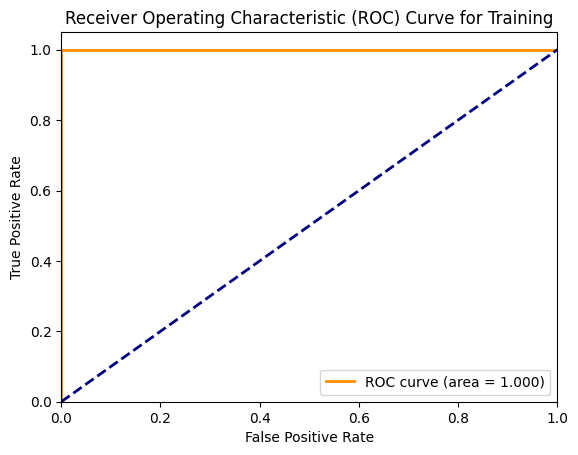

AUROC for Validation: 0.770


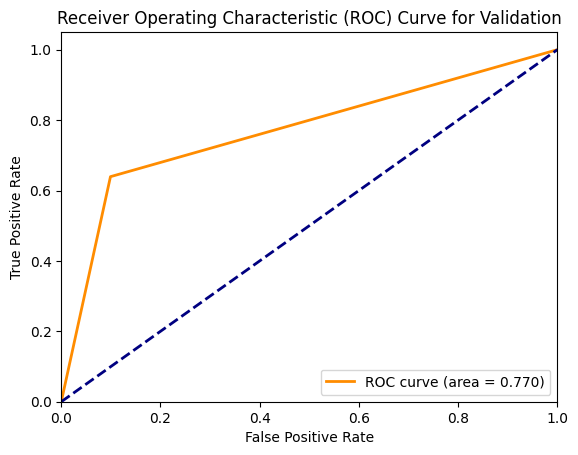

In [80]:
compute_auroc_and_build_roc(dataset["X_train"], dataset["train_targets"], 'Training')
compute_auroc_and_build_roc(dataset["X_val"], dataset["val_targets"], 'Validation')

In [84]:
dataset["val_targets"].value_counts() / len(dataset["val_targets"])

,count
Exited,
0.0,0.796667
1.0,0.203333


In [73]:
model.tree_.max_depth

28

In [96]:
model = DecisionTreeClassifier(random_state=42, max_depth=2)

In [97]:
%%time
model.fit(dataset["X_train"], dataset["train_targets"])

CPU times: user 17.3 ms, sys: 650 µs, total: 17.9 ms
Wall time: 22.2 ms


DecisionTreeClassifier(max_depth=2, random_state=42)

In [94]:
from sklearn.tree import plot_tree, export_text

In [98]:
tree_text = export_text(model, max_depth=2, feature_names=list(dataset["X_train"].columns))
print(tree_text[:5000])

|--- Age <= 43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- class: 0.0
|   |--- NumOfProducts >  1.50
|   |   |--- class: 0.0
|--- Age >  43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- class: 1.0
|   |--- NumOfProducts >  1.50
|   |   |--- class: 0.0



Найвпливовішими ознаками є Age, NumOfProducts

In [99]:
model.feature_importances_.round(2)

array([0.71, 0.  , 0.  , 0.29, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

In [100]:
importance_df =  pd.DataFrame({
    "feature": dataset["X_train"].columns,
    "importance": model.feature_importances_ }).sort_values("importance", ascending=False)

In [102]:
importance_df.head(10)

,feature,importance
0,Age,0.714962
3,NumOfProducts,0.285038
1,Tenure,0.000000
2,Balance,0.000000
4,HasCrCard,0.000000
5,IsActiveMember,0.000000
6,EstimatedSalary,0.000000
7,Geography_France,0.000000
8,Geography_Germany,0.000000
9,Geography_Spain,0.000000


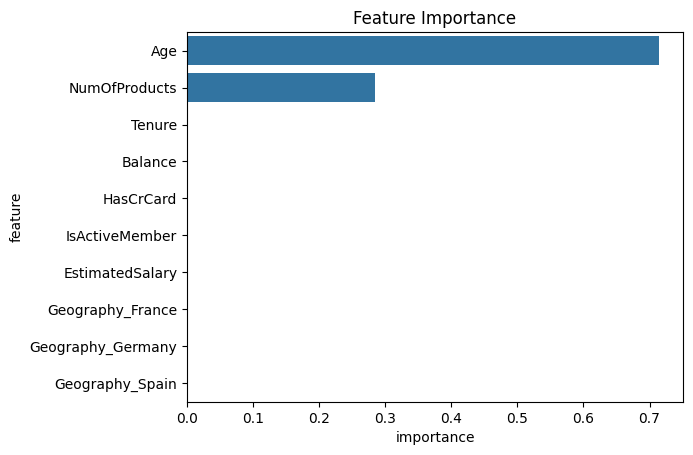

In [103]:
import seaborn as sns

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [104]:
model = DecisionTreeClassifier(random_state=42, max_depth=4)

In [105]:
%%time
model.fit(dataset["X_train"], dataset["train_targets"])

CPU times: user 26 ms, sys: 943 µs, total: 26.9 ms
Wall time: 24.1 ms


DecisionTreeClassifier(max_depth=4, random_state=42)

In [108]:
model.predict_proba(dataset["X_train"])

array([[0.88567616, 0.11432384],
       [0.88567616, 0.11432384],
       [0.92909897, 0.07090103],
       ...,
       [0.98562943, 0.01437057],
       [0.98562943, 0.01437057],
       [0.98562943, 0.01437057]])

In [107]:
def compute_auroc_and_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba)

  # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.3f}')

In [109]:
compute_auroc_and_roc(dataset["X_train"], dataset["train_targets"], 'Training')
compute_auroc_and_roc(dataset["X_val"], dataset["val_targets"], 'Validation')

AUROC for Training: 0.911
AUROC for Validation: 0.911


In [115]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(dataset["X_train"], dataset["train_targets"])

DecisionTreeClassifier(max_depth=5, random_state=42)

In [116]:
compute_auroc_and_roc(dataset["X_train"], dataset["train_targets"], 'Training')
compute_auroc_and_roc(dataset["X_val"], dataset["val_targets"], 'Validation')

AUROC for Training: 0.926
AUROC for Validation: 0.923


In [156]:
model = DecisionTreeClassifier(random_state=42, max_depth=5, max_leaf_nodes=50)
model.fit(dataset["X_train"], dataset["train_targets"])

DecisionTreeClassifier(max_depth=5, random_state=42)

In [157]:
compute_auroc_and_roc(dataset["X_train"], dataset["train_targets"], 'Training')
compute_auroc_and_roc(dataset["X_val"], dataset["val_targets"], 'Validation')

AUROC for Training: 0.926
AUROC for Validation: 0.923


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [147]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

def max_depth_roc_auc(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(dataset["X_train"], dataset["train_targets"])

    train_pred_proba = model.predict_proba(dataset["X_train"])[:, 1]
    val_pred_proba = model.predict_proba(dataset["X_val"])[:, 1]

    train_roc_auc = roc_auc_score(dataset["train_targets"], train_pred_proba)
    val_roc_auc = roc_auc_score(dataset["val_targets"], val_pred_proba)

    return {'Max Depth': md, 'Training ROC AUC': train_roc_auc, 'Validation ROC AUC': val_roc_auc}


In [148]:

%%time
roc_auc_df = pd.DataFrame([max_depth_roc_auc(md) for md in range(1, 21)])

CPU times: user 1.05 s, sys: 0 ns, total: 1.05 s
Wall time: 1.05 s


In [152]:
roc_auc_df

,Max Depth,Training ROC AUC,Validation ROC AUC
0,1,0.744727,0.734865
1,2,0.842908,0.846496
2,3,0.897184,0.891146
3,4,0.911281,0.911264
4,5,0.925629,0.923202
5,6,0.933751,0.920391
6,7,0.940932,0.916200
7,8,0.949077,0.901371
8,9,0.957940,0.879875
9,10,0.967728,0.869205


In [154]:
roc_auc_df.style.background_gradient(subset='Validation ROC AUC', cmap='Blues')

,Max Depth,Training ROC AUC,Validation ROC AUC
0,1,0.744727,0.734865
1,2,0.842908,0.846496
2,3,0.897184,0.891146
3,4,0.911281,0.911264
4,5,0.925629,0.923202
5,6,0.933751,0.920391
6,7,0.940932,0.916200
7,8,0.949077,0.901371
8,9,0.957940,0.879875
9,10,0.967728,0.869205


**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [159]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(dataset["X_train"], dataset["train_targets"])

DecisionTreeClassifier(max_depth=5, random_state=42)

In [160]:
raw_test_df = pd.read_csv("/content/test.csv", index_col=0)
raw_test_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72


In [161]:
raw_test_df.drop(columns=["CustomerId","Surname"], inplace=True)

In [162]:
test_dataset = preprocess_new_data(raw_test_df, dataset["encoder"], dataset["scaler"], dataset["input_cols"] )
test_dataset

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,,,,,,,,
15000,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,0.0,1.0
15001,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,0.0,1.0
15002,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,0.0,1.0
15003,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.0,0.0,1.0,0.0,1.0
15004,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,38.0,10.0,0.00,2.0,1.0,1.0,49637.65,0.0,0.0,1.0,0.0,1.0
24996,39.0,9.0,0.00,2.0,1.0,1.0,142513.50,0.0,0.0,1.0,0.0,1.0
24997,30.0,9.0,0.00,2.0,1.0,0.0,4861.72,1.0,0.0,0.0,0.0,1.0


In [163]:
test_pred = model.predict(test_dataset)
test_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [166]:
test_pred_proba = model.predict_proba(test_dataset)[:, 1]
test_pred_proba

array([0.23791103, 0.02761341, 0.02761341, ..., 0.00892374, 0.04173355,
       0.20459082])

In [168]:
sample = pd.read_csv("/content/sample_submission.csv", index_col=0)
sample.drop(columns="Exited")

""
id
15000
15001
15002
15003
15004
...
24995
24996
24997


In [169]:
sample["Exited"] = test_pred_proba
sample

,Exited
id,
15000,0.237911
15001,0.027613
15002,0.027613
15003,0.770925
15004,0.027613
...,...
24995,0.027613
24996,0.027613
24997,0.008924


In [173]:
sample.to_csv("submission.csv")

In [174]:
check_file = pd.read_csv("submission.csv")
check_file

,id,Exited
0,15000,0.237911
1,15001,0.027613
2,15002,0.027613
3,15003,0.770925
4,15004,0.027613
...,...,...
9995,24995,0.027613
9996,24996,0.027613
9997,24997,0.008924
9998,24998,0.041734


Перший Submit Дерев рішень видав результат гірший за логістичну регресію

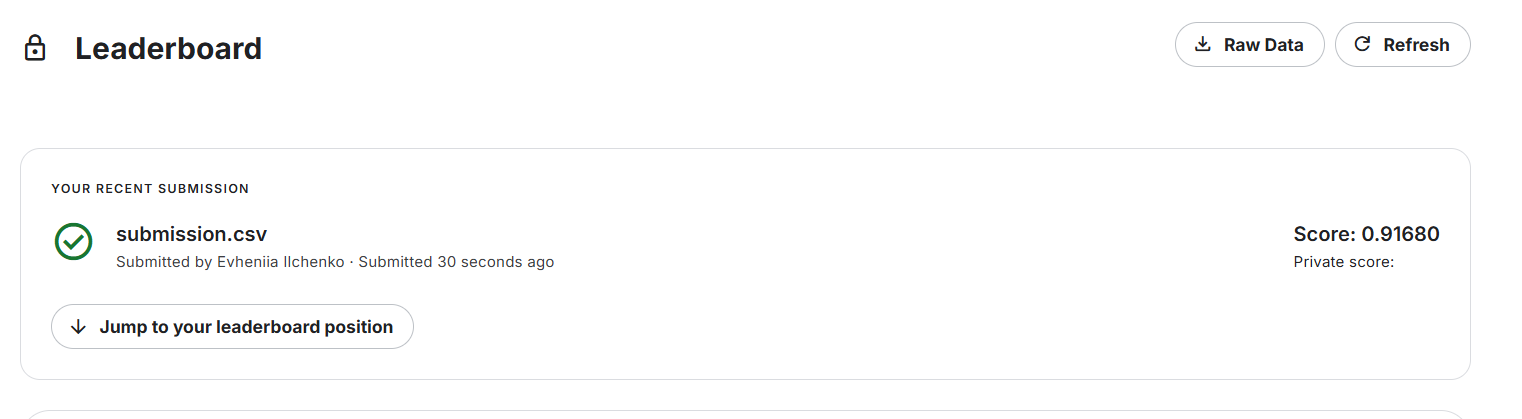